In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
non_perturbed_dataset = 'standard'
datasets = [
    'rotated'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
FONT_SIZE=18
TICK_FONT_SIZE=12
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [3]:
def get_nsl_results(net_type, dataset):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
    acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'.json').read())    
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds

In [4]:
def get_nsl_high_results(net_type, dataset):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
        
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+dataset+'.json').read())    
    for n in noise_pcts:
        if n > 70:
            acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
            acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds


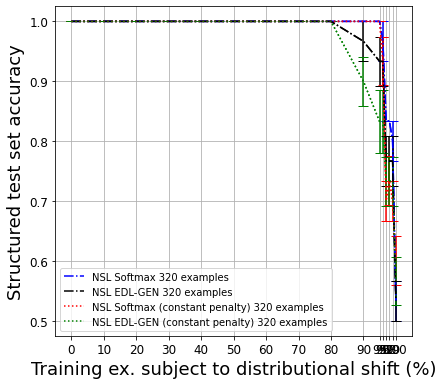

In [9]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    
    nsl_acc, nsl_err = get_nsl_results('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant penalty) 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="r", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_results('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant penalty) 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="g", capsize=5,linestyle=':')
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
       

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
plt.legend()
plt.show()

# 80-100% 

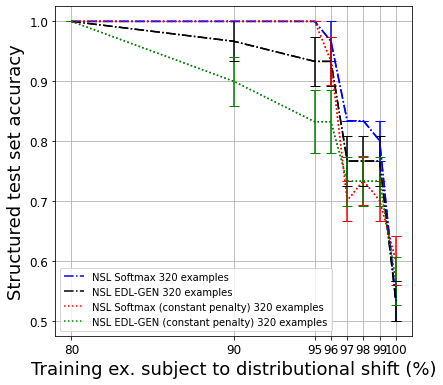

In [8]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

# nps_x = [0]+noise_pcts
nps_x = [80,90,95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl_acc, nsl_err = get_nsl_high_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_nsl_high_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    
    nsl_acc, nsl_err = get_nsl_high_results('constant_softmax', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL Softmax (constant penalty) 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="r", capsize=5,linestyle=':')
    
    nsl_acc, nsl_err = get_nsl_high_results('constant_edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (constant penalty) 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="g", capsize=5,linestyle=':')
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    
       

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
plt.legend()
plt.show()